<a href="https://colab.research.google.com/github/kakopo/loan-default-prediction-challenge-group-8/blob/main/data_analysis_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [698]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [699]:
!pip install category_encoders
!pip install pandas-profiling xgboost gradio

In [700]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import joblib
from datetime import datetime, date
import calendar
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from ydata_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [701]:
perf = pd.read_csv('/content/drive/MyDrive/Classroom/loan_data/trainperf.csv')
perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [702]:
prev = pd.read_csv('/content/drive/MyDrive/Classroom/loan_data/trainprevloans.csv')
prev.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [703]:
demo = pd.read_csv('/content/drive/MyDrive/Classroom/loan_data/traindemographics.csv')
demo.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [704]:
perf = perf.drop(columns=['referredby'])

In [705]:
prev = prev.drop(columns=['referredby'])

In [706]:
demo = demo.drop(columns=['bank_branch_clients'])

In [707]:
perf.columns = ['customerid','perf_systemloanid','perf_loannumber','perf_approveddate','perf_creationdate',
                'perf_loanamount','perf_totaldue','perf_termdays','good_bad_flag']

In [708]:
loan_data= pd.merge(perf, prev["systemloanid"], left_index= True, right_index= True)
loan_data= pd.merge(loan_data, prev["loannumber"], left_index= True, right_index= True)
loan_data= pd.merge(loan_data, prev["approveddate"], left_index= True, right_index= True)
loan_data= pd.merge(loan_data, prev["creationdate"], left_index= True, right_index= True)
loan_data= pd.merge(loan_data, prev["loanamount"], left_index= True, right_index= True)
loan_data= pd.merge(loan_data, prev["totaldue"], left_index= True, right_index= True)
loan_data= pd.merge(loan_data, prev["termdays"], left_index= True, right_index= True)
loan_data= pd.merge(loan_data, prev["closeddate"], left_index= True, right_index= True)
loan_data= pd.merge(loan_data, prev["firstduedate"], left_index= True, right_index= True)
loan_data= pd.merge(loan_data, prev["firstrepaiddate"], left_index= True, right_index= True)

loan_data= pd.merge(loan_data, demo["birthdate"], left_index= True, right_index= True)
loan_data= pd.merge(loan_data, demo["bank_account_type"], left_index= True, right_index= True)
loan_data= pd.merge(loan_data, demo["longitude_gps"], left_index= True, right_index= True)
loan_data= pd.merge(loan_data, demo["latitude_gps"], left_index= True, right_index= True)
loan_data= pd.merge(loan_data, demo["bank_name_clients"], left_index= True, right_index= True)
loan_data= pd.merge(loan_data, demo["employment_status_clients"], left_index= True, right_index= True)
loan_data= pd.merge(loan_data, demo["level_of_education_clients"], left_index= True, right_index= True)

loan_data

,customerid,perf_systemloanid,perf_loannumber,perf_approveddate,perf_creationdate,perf_loanamount,perf_totaldue,perf_termdays,good_bad_flag,systemloanid,...,closeddate,firstduedate,firstrepaiddate,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,301682320,...,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good,301883808,...,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,Permanent,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good,301831714,...,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good,301861541,...,2017-04-24 01:35:52.000000,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good,301941754,...,2017-07-14 21:18:43.000000,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,Permanent,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,8a858f6c570f2d6601572a4acffc221f,302000403,7,2017-07-28 12:00:25.000000,2017-07-28 11:00:18.000000,20000.0,24500.0,30,Good,301842567,...,2017-04-02 20:09:20.000000,2017-04-04 00:00:00.000000,2017-04-02 19:54:11.000000,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,Permanent,Graduate
4342,8a858f735aec46c4015af026256357b8,301999973,5,2017-07-28 07:58:26.000000,2017-07-28 06:57:16.000000,20000.0,24500.0,30,Good,301933850,...,2017-07-10 15:52:41.000000,2017-07-10 00:00:00.000000,2017-07-10 15:42:32.000000,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,NaN,NaN
4343,8a858f7c5be8dc45015bea117aa57efe,301979154,3,2017-07-15 13:35:01.000000,2017-07-15 12:34:53.000000,10000.0,11500.0,15,Good,301786847,...,2017-02-02 09:11:42.000000,2017-02-03 00:00:00.000000,2017-02-02 08:56:32.000000,1989-09-26 00:00:00.000000,Savings,6.295530,7.092508,GT Bank,Permanent,NaN
4344,8a858f8658c206a90158d0c447863597,301988349,8,2017-07-20 21:20:00.000000,2017-07-20 20:19:53.000000,30000.0,34500.0,30,Good,301916466,...,2017-07-07 14:57:38.000000,2017-06-22 00:00:00.000000,2017-06-28 19:18:40.000000,1985-09-06 00:00:00.000000,Savings,3.354206,6.539070,GT Bank,Permanent,Primary


In [709]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4346 entries, 0 to 4345
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   perf_systemloanid           4346 non-null   int64  
 2   perf_loannumber             4346 non-null   int64  
 3   perf_approveddate           4346 non-null   object 
 4   perf_creationdate           4346 non-null   object 
 5   perf_loanamount             4346 non-null   float64
 6   perf_totaldue               4346 non-null   float64
 7   perf_termdays               4346 non-null   int64  
 8   good_bad_flag               4346 non-null   object 
 9   systemloanid                4346 non-null   int64  
 10  loannumber                  4346 non-null   int64  
 11  approveddate                4346 non-null   object 
 12  creationdate                4346 non-null   object 
 13  loanamount                  4346 non-n

In [710]:
loan_data = loan_data.drop(columns=['level_of_education_clients'])

In [711]:
# Identify outliers
outliers = loan_data.describe().loc[['min', 'max']].T
print(outliers)

                            min           max
perf_systemloanid  3.019585e+08  3.020040e+08
perf_loannumber    2.000000e+00  2.700000e+01
perf_loanamount    1.000000e+04  6.000000e+04
perf_totaldue      1.000000e+04  6.810000e+04
perf_termdays      1.500000e+01  9.000000e+01
systemloanid       3.016001e+08  3.019905e+08
loannumber         1.000000e+00  2.400000e+01
loanamount         4.000000e+03  5.000000e+04
totaldue           4.600000e+03  5.750000e+04
termdays           1.500000e+01  9.000000e+01
longitude_gps     -1.182470e+02  1.512093e+02
latitude_gps      -3.386882e+01  7.122807e+01


In [712]:
categorical = [var for var in loan_data.columns if loan_data[var].dtype == 'O']
print('There are {} categorical variables \n'.format(len(categorical)))
print('They are: ', categorical)

There are 13 categorical variables 

They are:  ['customerid', 'perf_approveddate', 'perf_creationdate', 'good_bad_flag', 'approveddate', 'creationdate', 'closeddate', 'firstduedate', 'firstrepaiddate', 'birthdate', 'bank_account_type', 'bank_name_clients', 'employment_status_clients']


In [713]:
numerical = [var for var in loan_data.columns if loan_data[var].dtype != 'O']
print('There are {} numerical variables \n'.format(len(numerical)))
print('They are: ', numerical)

There are 12 numerical variables 

They are:  ['perf_systemloanid', 'perf_loannumber', 'perf_loanamount', 'perf_totaldue', 'perf_termdays', 'systemloanid', 'loannumber', 'loanamount', 'totaldue', 'termdays', 'longitude_gps', 'latitude_gps']


In [714]:
loan_data['birthdate'] = pd.to_datetime(loan_data['birthdate'])

In [715]:
loan_data['age'] = round(((datetime.now() - loan_data['birthdate'])/np.timedelta64(1, 'h')),0)

In [716]:
loan_data.head()

,customerid,perf_systemloanid,perf_loannumber,perf_approveddate,perf_creationdate,perf_loanamount,perf_totaldue,perf_termdays,good_bad_flag,systemloanid,...,closeddate,firstduedate,firstrepaiddate,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,age
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,Good,301682320,...,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,444190.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,Good,301883808,...,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,Permanent,336526.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,Good,301831714,...,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,326086.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,Good,301861541,...,2017-04-24 01:35:52.000000,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,1991-07-19,Savings,3.362850,6.642485,GT Bank,Permanent,288406.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,Good,301941754,...,2017-07-14 21:18:43.000000,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,1982-11-22,Savings,8.455332,11.971410,GT Bank,Permanent,364270.0


In [717]:
loan_data['employment_status_clients'].fillna("Employment_unknown", inplace=True)

In [718]:
loan_data['creationdate'] = pd.to_datetime(loan_data['creationdate'])
loan_data['closeddate'] = pd.to_datetime(loan_data['closeddate'])
loan_data['approveddate'] = pd.to_datetime(loan_data['approveddate'])
loan_data['firstrepaiddate'] = pd.to_datetime(loan_data['firstrepaiddate'])
loan_data['firstduedate'] = pd.to_datetime(loan_data['firstduedate'])
loan_data['perf_creationdate'] = pd.to_datetime(loan_data['perf_creationdate'])
loan_data['perf_approveddate'] = pd.to_datetime(loan_data['perf_approveddate'])

In [719]:
loan_data['creationlapse'] = ((loan_data.closeddate - loan_data.creationdate)/np.timedelta64(1, 'h'))
loan_data['creationlapse'] = loan_data['creationlapse'].round(1)

loan_data['approvedlapse'] = ((loan_data.closeddate - loan_data.approveddate)/np.timedelta64(1, 'h'))
loan_data['approvedlapse'] = loan_data['approvedlapse'].round(1)

loan_data['repaymentlapse'] = ((loan_data.firstduedate - loan_data.firstrepaiddate)/np.timedelta64(1, 'h'))
loan_data['repaymentlapse'] = loan_data['repaymentlapse'].round(1)

In [720]:
le= LabelEncoder()
loan_data["good_bad_flag"]= le.fit_transform(loan_data["good_bad_flag"].values)
# Good = 1, Bad = 0
loan_data["bank_account_type"]= le.fit_transform(loan_data["bank_account_type"].values)
# Savings = 2, Other = 1, Current = 0
loan_data["bank_name_clients"]= le.fit_transform(loan_data["bank_name_clients"].values)
loan_data["employment_status_clients"]= le.fit_transform(loan_data["employment_status_clients"].values)

In [721]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4346 entries, 0 to 4345
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customerid                 4346 non-null   object        
 1   perf_systemloanid          4346 non-null   int64         
 2   perf_loannumber            4346 non-null   int64         
 3   perf_approveddate          4346 non-null   datetime64[ns]
 4   perf_creationdate          4346 non-null   datetime64[ns]
 5   perf_loanamount            4346 non-null   float64       
 6   perf_totaldue              4346 non-null   float64       
 7   perf_termdays              4346 non-null   int64         
 8   good_bad_flag              4346 non-null   int64         
 9   systemloanid               4346 non-null   int64         
 10  loannumber                 4346 non-null   int64         
 11  approveddate               4346 non-null   datetime64[ns]
 12  creationdat

In [722]:
loan_data= loan_data.groupby(["customerid"]).mean().reset_index()

In [723]:
loan_data = loan_data.drop(columns = ['customerid', 'birthdate', 'approveddate',
                                      'creationdate', 'closeddate', 'firstduedate', 'firstrepaiddate',
                                      'perf_approveddate', 'perf_creationdate', 'employment_status_clients', 'bank_name_clients'], axis =1)


In [724]:
loan_data.isnull().sum()

perf_systemloanid    0
perf_loannumber      0
perf_loanamount      0
perf_totaldue        0
perf_termdays        0
good_bad_flag        0
systemloanid         0
loannumber           0
loanamount           0
totaldue             0
termdays             0
bank_account_type    0
longitude_gps        0
latitude_gps         0
age                  0
creationlapse        0
approvedlapse        0
repaymentlapse       0
dtype: int64

In [725]:
loan_data

,perf_systemloanid,perf_loannumber,perf_loanamount,perf_totaldue,perf_termdays,good_bad_flag,systemloanid,loannumber,loanamount,totaldue,termdays,bank_account_type,longitude_gps,latitude_gps,age,creationlapse,approvedlapse,repaymentlapse
0,301999397.0,2.0,10000.0,11500.0,15.0,0.0,301805176.0,5.0,10000.0,13000.0,30.0,1.0,4.703344,8.145461,315454.0,807.6,806.6,-104.4
1,301997672.0,5.0,30000.0,39000.0,60.0,1.0,301870697.0,2.0,10000.0,11500.0,15.0,1.0,3.379558,6.528579,279670.0,195.3,194.3,157.8
2,301976551.0,8.0,20000.0,24500.0,30.0,1.0,301851731.0,4.0,10000.0,13000.0,30.0,2.0,3.875880,7.346442,371710.0,643.7,642.7,90.2
3,301975382.0,9.0,30000.0,39000.0,60.0,1.0,301839561.0,4.0,20000.0,23800.0,30.0,2.0,3.204174,6.458467,386998.0,652.9,651.9,102.5
4,301979352.0,3.0,10000.0,11500.0,15.0,1.0,301752870.0,7.0,30000.0,34500.0,30.0,1.0,3.304591,6.503161,496558.0,710.1,709.1,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,301961209.0,7.0,30000.0,39000.0,60.0,1.0,301793241.0,1.0,10000.0,13000.0,30.0,2.0,7.590245,9.050526,411406.0,492.6,491.6,217.9
4342,301989105.0,7.0,30000.0,34500.0,30.0,1.0,301778114.0,4.0,20000.0,23800.0,30.0,2.0,4.560354,7.483788,301846.0,1179.4,1178.4,-168.0
4343,301965370.0,2.0,20000.0,24500.0,30.0,1.0,301879673.0,8.0,30000.0,36800.0,60.0,2.0,3.414980,6.701299,425446.0,700.1,699.1,11.1
4344,301992274.0,7.0,30000.0,34500.0,30.0,1.0,301890174.0,7.0,10000.0,12250.0,30.0,2.0,3.078753,6.602088,265918.0,689.0,688.0,60.7


In [726]:
testdemo = pd.read_csv('/content/drive/MyDrive/Classroom/loan_data/testdemographics.csv')
testperf = pd.read_csv('/content/drive/MyDrive/Classroom/loan_data/testperf.csv')
testprev = pd.read_csv('/content/drive/MyDrive/Classroom/loan_data/testprevloans.csv')

In [727]:
testperf = testperf.drop(columns=['referredby'])
testprev = testprev.drop(columns=['referredby'])

In [728]:
testdemo = testdemo.drop(columns=['bank_branch_clients'])

In [729]:
testperf.columns = ['customerid','perf_systemloanid','perf_loannumber','perf_approveddate','perf_creationdate',
                'perf_loanamount','perf_totaldue','perf_termdays']

In [730]:
test_loan_data= pd.merge(testperf, testprev["systemloanid"], left_index= True, right_index= True)
test_loan_data= pd.merge(test_loan_data, testprev["loannumber"], left_index= True, right_index= True)
test_loan_data= pd.merge(test_loan_data, testprev["approveddate"], left_index= True, right_index= True)
test_loan_data= pd.merge(test_loan_data, testprev["creationdate"], left_index= True, right_index= True)
test_loan_data= pd.merge(test_loan_data, testprev["loanamount"], left_index= True, right_index= True)
test_loan_data= pd.merge(test_loan_data, testprev["totaldue"], left_index= True, right_index= True)
test_loan_data= pd.merge(test_loan_data, testprev["termdays"], left_index= True, right_index= True)
test_loan_data= pd.merge(test_loan_data, testprev["closeddate"], left_index= True, right_index= True)
test_loan_data= pd.merge(test_loan_data, testprev["firstduedate"], left_index= True, right_index= True)
test_loan_data= pd.merge(test_loan_data, testprev["firstrepaiddate"], left_index= True, right_index= True)

test_loan_data= pd.merge(test_loan_data, testdemo["birthdate"], left_index= True, right_index= True)
test_loan_data= pd.merge(test_loan_data, testdemo["bank_account_type"], left_index= True, right_index= True)
test_loan_data= pd.merge(test_loan_data, testdemo["longitude_gps"], left_index= True, right_index= True)
test_loan_data= pd.merge(test_loan_data, testdemo["latitude_gps"], left_index= True, right_index= True)
test_loan_data= pd.merge(test_loan_data, testdemo["bank_name_clients"], left_index= True, right_index= True)
test_loan_data= pd.merge(test_loan_data, testdemo["employment_status_clients"], left_index= True, right_index= True)
test_loan_data= pd.merge(test_loan_data, testdemo["level_of_education_clients"], left_index= True, right_index= True)

test_loan_data

,customerid,perf_systemloanid,perf_loannumber,perf_approveddate,perf_creationdate,perf_loanamount,perf_totaldue,perf_termdays,systemloanid,loannumber,...,closeddate,firstduedate,firstrepaiddate,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,301621635,3,...,2016-06-17 00:04:15.000000,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000,1976-08-28 00:00:00.000000,Savings,5.296628,7.593965,Heritage Bank,Permanent,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,301810201,5,...,2017-03-02 16:22:58.000000,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000,1978-06-23 00:00:00.000000,Savings,3.294513,6.596602,UBA,Permanent,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,301831255,6,...,2017-04-02 00:44:24.000000,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000,1984-04-04 00:00:00.000000,Savings,8.501912,7.729364,First Bank,Permanent,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,301627292,3,...,2016-07-04 11:34:04.000000,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000,1983-05-28 00:00:00.000000,Savings,3.318904,6.681595,UBA,Permanent,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,301621095,2,...,2016-06-02 00:02:58.000000,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,Self-Employed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,301991141,3,47:02.0,46:53.0,10000,11500.0,15,301845948,6,...,2017-05-24 15:49:31.000000,2017-04-24 00:00:00.000000,2017-04-25 10:28:06.000000,1980-08-05 00:00:00.000000,Savings,3.583009,6.493201,GT Bank,NaN,NaN
1446,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,00:45.0,04:05.0,10000,13000.0,30,301931676,1,...,2017-07-08 05:10:32.000000,2017-07-10 00:00:00.000000,2017-07-08 05:00:21.000000,1994-02-25 00:00:00.000000,Savings,3.838206,7.352298,GT Bank,Student,NaN
1447,8a858fde56eb02280156f59b976d46c0,301994653,9,09:40.0,09:33.0,40000,48000.0,60,301853590,1,...,2017-04-05 22:22:44.000000,2017-04-19 00:00:00.000000,2017-04-05 22:07:36.000000,1978-07-30 00:00:00.000000,Savings,3.448487,6.435382,Diamond Bank,Permanent,NaN
1448,8a858e10570f2d65015717fcfec44996,301961483,14,47:54.0,46:49.0,60000,68100.0,90,301930007,9,...,2017-07-03 15:33:59.000000,2017-07-07 00:00:00.000000,2017-07-03 15:23:50.000000,1992-04-02 00:00:00.000000,Savings,7.036701,4.781278,Stanbic IBTC,Permanent,NaN


In [731]:
test_loan_data = test_loan_data.drop(columns=['level_of_education_clients'])

In [732]:
test_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450 entries, 0 to 1449
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 1450 non-null   object 
 1   perf_systemloanid          1450 non-null   int64  
 2   perf_loannumber            1450 non-null   int64  
 3   perf_approveddate          1450 non-null   object 
 4   perf_creationdate          1450 non-null   object 
 5   perf_loanamount            1450 non-null   int64  
 6   perf_totaldue              1450 non-null   float64
 7   perf_termdays              1450 non-null   int64  
 8   systemloanid               1450 non-null   int64  
 9   loannumber                 1450 non-null   int64  
 10  approveddate               1450 non-null   object 
 11  creationdate               1450 non-null   object 
 12  loanamount                 1450 non-null   float64
 13  totaldue                   1450 non-null   float64
 1

In [733]:
test_loan_data['birthdate'] = pd.to_datetime(test_loan_data['birthdate'])

In [734]:
test_loan_data['age'] = round(((datetime.now() - test_loan_data['birthdate'])/np.timedelta64(1, 'h')),0)

In [735]:
test_loan_data['employment_status_clients'].fillna("Employment_unknown", inplace=True)

In [736]:
# dealing with all the date and time values and converting them to datetime objects

test_loan_data['creationdate'] = pd.to_datetime(test_loan_data['creationdate'])
test_loan_data['closeddate'] = pd.to_datetime(test_loan_data['closeddate'])
test_loan_data['approveddate'] = pd.to_datetime(test_loan_data['approveddate'])
test_loan_data['firstrepaiddate'] = pd.to_datetime(test_loan_data['firstrepaiddate'])
test_loan_data['firstduedate'] = pd.to_datetime(test_loan_data['firstduedate'])


test_loan_data['creationlapse'] = ((test_loan_data.closeddate - test_loan_data.creationdate)/np.timedelta64(1, 'h'))
test_loan_data['creationlapse'] = test_loan_data['creationlapse'].round(1).astype(float)


test_loan_data['approvedlapse'] = ((test_loan_data.closeddate - test_loan_data.approveddate)/np.timedelta64(1, 'h'))
test_loan_data['approvedlapse'] = test_loan_data['approvedlapse'].round(1).astype(float)


test_loan_data['repaymentlapse'] = ((test_loan_data.firstduedate - test_loan_data.firstrepaiddate)/np.timedelta64(1, 'h'))
test_loan_data['repaymentlapse'] = test_loan_data['repaymentlapse'].round(1).astype(float)

In [737]:
le= LabelEncoder()
test_loan_data["bank_account_type"]= le.fit_transform(test_loan_data["bank_account_type"].values)
test_loan_data["bank_name_clients"]= le.fit_transform(test_loan_data["bank_name_clients"].values)
test_loan_data["employment_status_clients"]= le.fit_transform(test_loan_data["employment_status_clients"].values)

In [738]:
test_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450 entries, 0 to 1449
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customerid                 1450 non-null   object        
 1   perf_systemloanid          1450 non-null   int64         
 2   perf_loannumber            1450 non-null   int64         
 3   perf_approveddate          1450 non-null   object        
 4   perf_creationdate          1450 non-null   object        
 5   perf_loanamount            1450 non-null   int64         
 6   perf_totaldue              1450 non-null   float64       
 7   perf_termdays              1450 non-null   int64         
 8   systemloanid               1450 non-null   int64         
 9   loannumber                 1450 non-null   int64         
 10  approveddate               1450 non-null   datetime64[ns]
 11  creationdate               1450 non-null   datetime64[ns]
 12  loanamount 

In [739]:
# test_loan_data= test_loan_data.groupby(["customerid"]).mean().reset_index()

In [740]:
test_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450 entries, 0 to 1449
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   customerid                 1450 non-null   object        
 1   perf_systemloanid          1450 non-null   int64         
 2   perf_loannumber            1450 non-null   int64         
 3   perf_approveddate          1450 non-null   object        
 4   perf_creationdate          1450 non-null   object        
 5   perf_loanamount            1450 non-null   int64         
 6   perf_totaldue              1450 non-null   float64       
 7   perf_termdays              1450 non-null   int64         
 8   systemloanid               1450 non-null   int64         
 9   loannumber                 1450 non-null   int64         
 10  approveddate               1450 non-null   datetime64[ns]
 11  creationdate               1450 non-null   datetime64[ns]
 12  loanamount 

In [741]:
test_loan_data = test_loan_data.drop(columns = ['birthdate', 'approveddate',
                                      'creationdate', 'closeddate', 'firstduedate', 'firstrepaiddate',
                                      'perf_approveddate', 'perf_creationdate', 'employment_status_clients', 'bank_name_clients'], axis =1)
test_loan_data.head()

,customerid,perf_systemloanid,perf_loannumber,perf_loanamount,perf_totaldue,perf_termdays,systemloanid,loannumber,loanamount,totaldue,termdays,bank_account_type,longitude_gps,latitude_gps,age,creationlapse,approvedlapse,repaymentlapse
0,8a858899538ddb8e015390510b321f08,301998974,4,10000,12250.0,30,301621635,3,10000.0,13000.0,30,2,5.296628,7.593965,418918.0,734.5,733.5,-15.7
1,8a858959537a097401537a4e316e25f7,301963615,10,40000,44000.0,30,301810201,5,30000.0,36800.0,60,2,3.294513,6.596602,402982.0,619.9,618.9,79.9
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,20000,24500.0,30,301831255,6,30000.0,34400.0,30,2,8.501912,7.729364,352294.0,687.3,686.3,26.5
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,30000,34500.0,30,301627292,3,10000.0,13000.0,30,2,3.318904,6.681595,359782.0,766.1,765.1,-11.3
4,8a858e225a28c713015a30db5c48383d,301959177,4,20000,24500.0,30,301621095,2,10000.0,11500.0,15,2,6.354624,4.949031,369982.0,399.8,398.8,-39.4


In [742]:
test_loan_data.isnull().sum()

customerid           0
perf_systemloanid    0
perf_loannumber      0
perf_loanamount      0
perf_totaldue        0
perf_termdays        0
systemloanid         0
loannumber           0
loanamount           0
totaldue             0
termdays             0
bank_account_type    0
longitude_gps        0
latitude_gps         0
age                  0
creationlapse        0
approvedlapse        0
repaymentlapse       0
dtype: int64

In [743]:
test_loan_data

,customerid,perf_systemloanid,perf_loannumber,perf_loanamount,perf_totaldue,perf_termdays,systemloanid,loannumber,loanamount,totaldue,termdays,bank_account_type,longitude_gps,latitude_gps,age,creationlapse,approvedlapse,repaymentlapse
0,8a858899538ddb8e015390510b321f08,301998974,4,10000,12250.0,30,301621635,3,10000.0,13000.0,30,2,5.296628,7.593965,418918.0,734.5,733.5,-15.7
1,8a858959537a097401537a4e316e25f7,301963615,10,40000,44000.0,30,301810201,5,30000.0,36800.0,60,2,3.294513,6.596602,402982.0,619.9,618.9,79.9
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,20000,24500.0,30,301831255,6,30000.0,34400.0,30,2,8.501912,7.729364,352294.0,687.3,686.3,26.5
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,30000,34500.0,30,301627292,3,10000.0,13000.0,30,2,3.318904,6.681595,359782.0,766.1,765.1,-11.3
4,8a858e225a28c713015a30db5c48383d,301959177,4,20000,24500.0,30,301621095,2,10000.0,11500.0,15,2,6.354624,4.949031,369982.0,399.8,398.8,-39.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,301991141,3,10000,11500.0,15,301845948,6,30000.0,36800.0,60,2,3.583009,6.493201,384406.0,1462.4,1461.4,-34.5
1446,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,10000,13000.0,30,301931676,1,10000.0,13000.0,30,2,3.838206,7.352298,265558.0,709.1,708.1,43.0
1447,8a858fde56eb02280156f59b976d46c0,301994653,9,40000,48000.0,60,301853590,1,10000.0,11500.0,15,2,3.448487,6.435382,402094.0,51.6,50.6,313.9
1448,8a858e10570f2d65015717fcfec44996,301961483,14,60000,68100.0,90,301930007,9,20000.0,24500.0,30,2,7.036701,4.781278,282214.0,627.4,626.4,80.6


In [744]:
#separating the input features, X and the target feature, y that we want to predict
X1 = loan_data.drop(['good_bad_flag'], axis=1)
y1 = loan_data['good_bad_flag']

In [745]:
loan_data['good_bad_flag'].value_counts()

good_bad_flag
1.0    3403
0.0     943
Name: count, dtype: int64

In [746]:
#Giving ourselves a test set of 20% of the initial records
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state= 4)

In [747]:
#Looking at the shape of our training and testing data
X_train.shape, X_test.shape

((3476, 17), (870, 17))

In [748]:
cols = X_train.columns
#Using a standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [749]:
#Building our logistic regression model
logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [750]:
#Providing our testing data for predictions
y_pred_test = logreg.predict(X_test)

In [751]:
#looking at the predictions given by the model
print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_test))

Model accuracy score(test):  0.771264367816092


In [752]:
y_pred_train = logreg.predict(X_train)
print('Model accuracy score(train): ', accuracy_score(y_train, y_pred_train))

Model accuracy score(train):  0.785385500575374


<Axes: ylabel='Feature'>

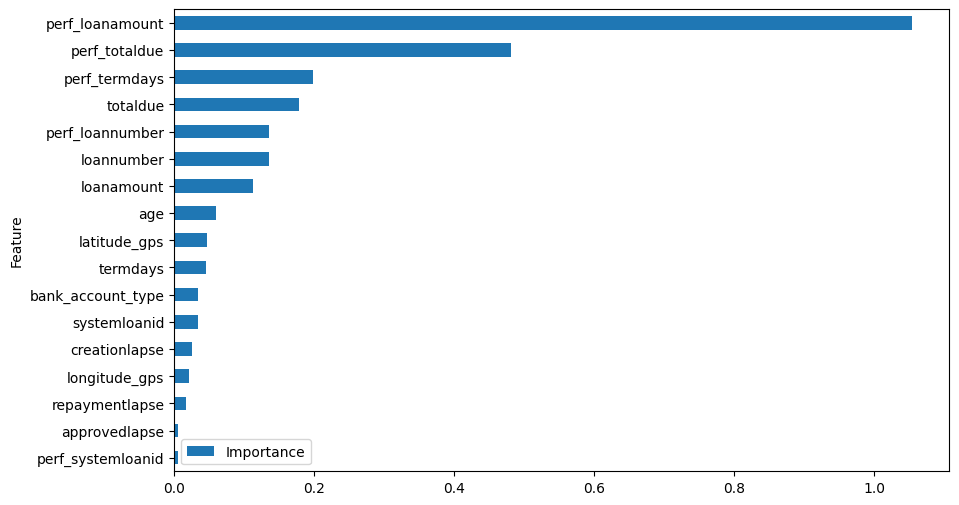

In [753]:
coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X1.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [754]:
#confusion matrix for our model
cm =confusion_matrix(y_test, y_pred_test)

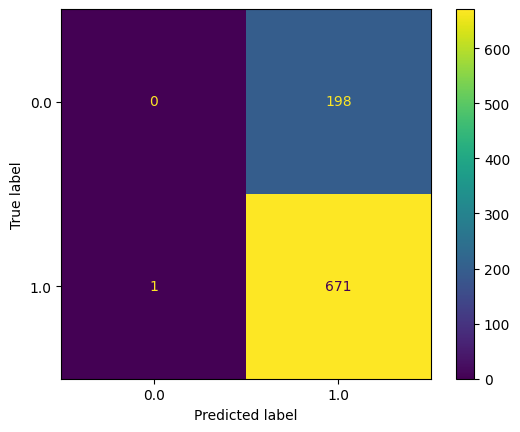

In [755]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [756]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       198
         1.0       0.77      1.00      0.87       672

    accuracy                           0.77       870
   macro avg       0.39      0.50      0.44       870
weighted avg       0.60      0.77      0.67       870



In [757]:
X = loan_data.drop(['good_bad_flag'], axis=1)
y = loan_data['good_bad_flag']

In [758]:
#SMOTE is an oversampling technique that creates new data from existing
#for the minority class in this case, bad loans
#the sampling strategy chosen is all, no change with it being 'minority'
smote_algo = SMOTE(sampling_strategy='all',random_state=0)
smote_data_X, smote_data_Y = smote_algo.fit_resample(X,y)
smote_data_X = pd.DataFrame(data=smote_data_X, columns=X.columns)
smote_data_Y = pd.DataFrame(data=smote_data_Y, columns=['good_bad_flag'])

In [759]:
smote_data = smote_data_X
smote_data['good_bad_flag'] = smote_data_Y['good_bad_flag']

In [760]:
smote_data_Y['good_bad_flag'].value_counts()

good_bad_flag
0.0    3403
1.0    3403
Name: count, dtype: int64

In [761]:
X = smote_data.drop(['good_bad_flag'],axis=1)
y = smote_data['good_bad_flag']

In [762]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2)

In [763]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [764]:
X_train.shape, X_test.shape

((5444, 17), (1362, 17))

In [765]:
logreg = LogisticRegression(solver='liblinear', random_state=3)

In [766]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=3, solver='liblinear')

In [767]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([0., 1., 1., ..., 0., 0., 1.])

In [768]:
print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_test))

Model accuracy score(test):  0.579295154185022


In [769]:
y_pred_train = logreg.predict(X_train)
print('Model accuracy score(train): ', accuracy_score(y_train, y_pred_train))

Model accuracy score(train):  0.6059882439382807


<Axes: ylabel='Feature'>

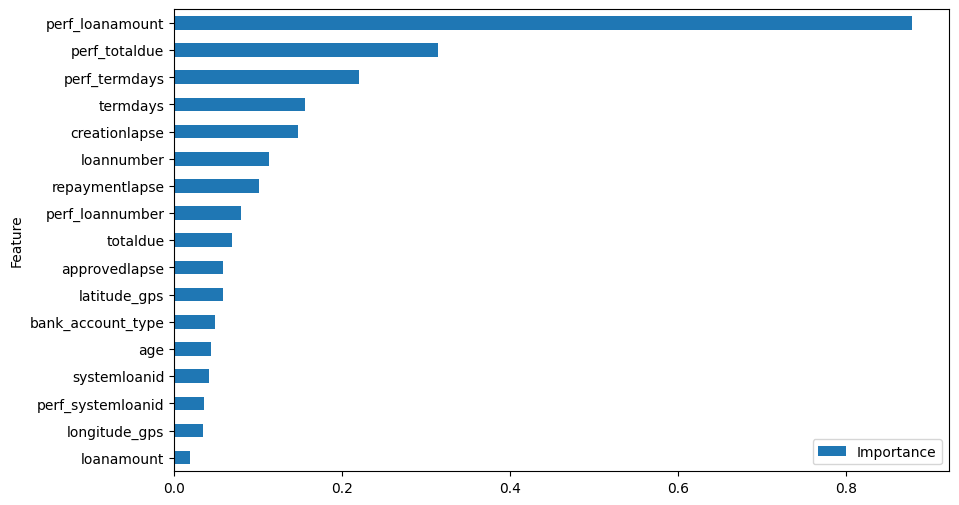

In [770]:
coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [771]:
cm1 =confusion_matrix(y_test, y_pred_test)

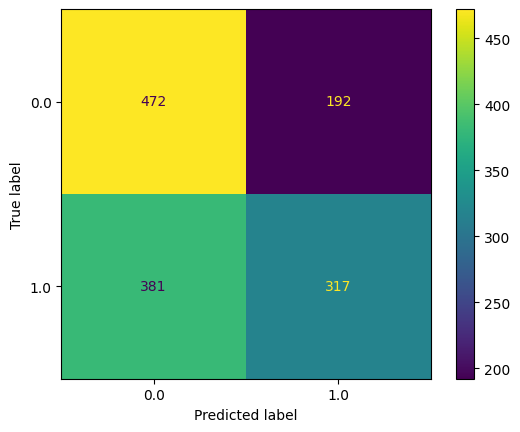

In [772]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=logreg.classes_)
disp.plot()

In [773]:
train_x, val_x, train_y, val_y= train_test_split(X,y,test_size= 0.2, random_state= 42)
# class_weight='balanced',max_depth=5,max_features='sqrt',n_estimators=300,random_state=24
Rf= RandomForestClassifier(class_weight='balanced', max_features='sqrt', n_estimators= 700, random_state= 0)
Rf.fit(train_x,train_y)
pred= Rf.predict(val_x)
print("accuracy score:",accuracy_score(pred,val_y))
# print(1- (accuracy_score(pred, val_y)))

accuracy score: 0.8715124816446402


In [774]:
index = test_loan_data.pop('customerid')

<Axes: >

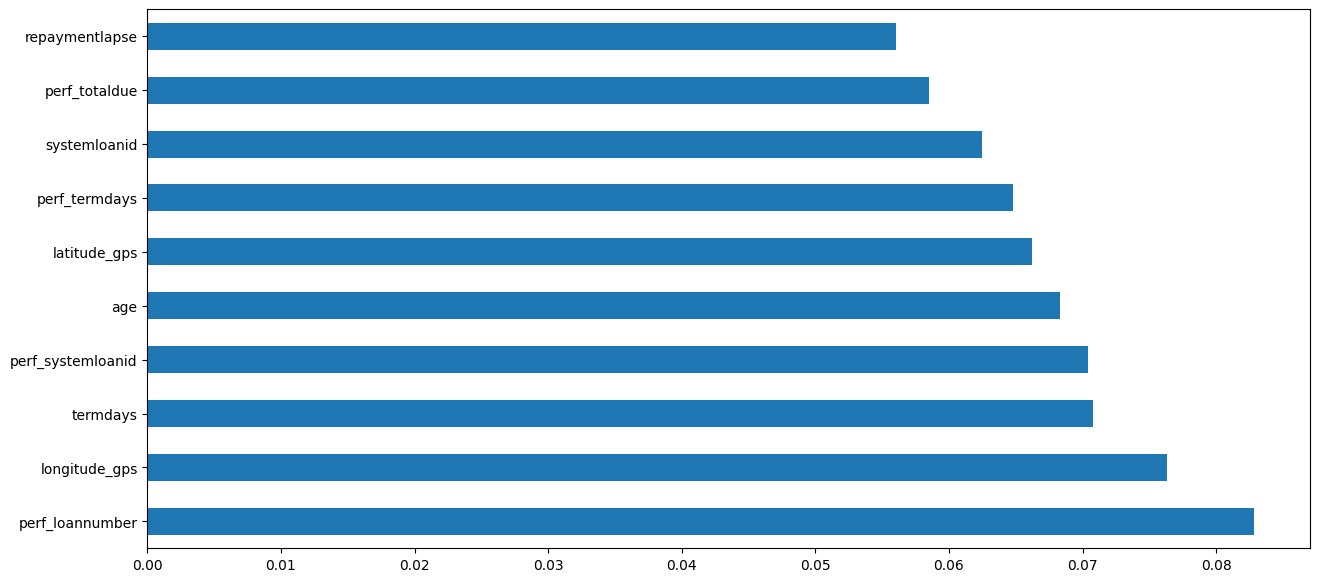

In [775]:
#feature importance for Random ForestClassifier

%matplotlib inline
plt.figure(figsize=(15,7))
feat_importances = pd.Series(Rf.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [776]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(learning_rate= 0.1, random_state= 0, n_estimators= 100)

# fit the model with the training data
GB.fit(train_x,train_y)

# predict the target on the train dataset
predict_train = GB.predict(val_x)

# Accuray Score on train dataset
print("accuracy score:",accuracy_score(pred,val_y))

accuracy score: 0.8715124816446402


In [777]:
cm2 = confusion_matrix(val_y, pred)

In [778]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=logreg.classes_)

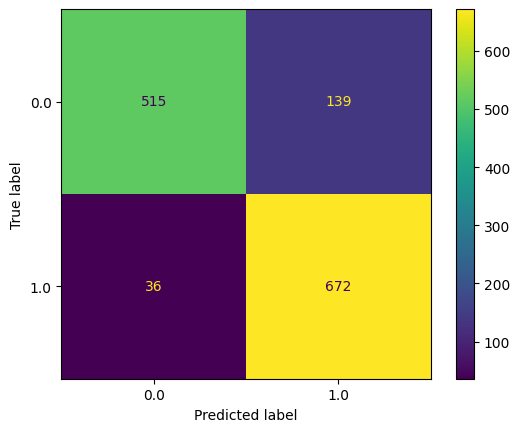

In [779]:
disp.plot()

In [780]:
test_that = Rf.predict(test_loan_data)

In [781]:
test_hub = pd.DataFrame({'customerid':index, 'Good_Bad_flag': test_that})

test_hub.to_csv('sample_submission.csv', index= False)

In [782]:
test_hub

,customerid,Good_Bad_flag
0,8a858899538ddb8e015390510b321f08,0.0
1,8a858959537a097401537a4e316e25f7,1.0
2,8a8589c253ace09b0153af6ba58f1f31,1.0
3,8a858e095aae82b7015aae86ca1e030b,1.0
4,8a858e225a28c713015a30db5c48383d,1.0
...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,1.0
1446,8a858fcb5b00cc54015b0253ced26a5f,1.0
1447,8a858fde56eb02280156f59b976d46c0,1.0
1448,8a858e10570f2d65015717fcfec44996,1.0
